# 머신 러닝 1장

머신 러닝 :  
모델 생성 -> 모델 훈련(fit) -> 모델 평가(score) -> 새로운 데이터 결과 예측(predict)

### 첫 번째 머신러닝 프로그램
생선 분류 문제 : 생선의 길이와 무게로 비교

- 데이터 준비

In [1]:
# 도미 길이 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미 무게 데이터
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

# 빙어 길이 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 무게 데이터
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# zip 함수를 통한 1차원 리스트 2개를 2차원 리스트로 변경
fish_data = [[l, w] for l, w in zip(length, weight)]

# 정답 데이터 준비
fish_target = [1] * 35 + [0] * 14

### KNeighborClassifier()  
• k-최근접 이웃 분류 모델  
• n_neighbors 변수에 이웃의 개수를 지정 (default값=5)

In [2]:
# 시각화를 위한 matplotlib import
import matplotlib.pyplot as plt
# 폰트 깨짐 방지를 위한 platfrom 라이브러리 import
import platform
# 머신러닝에 사용되는 sklearn import
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# 폰트 설정
if	platform.system()	==	'Windows':
    plt.rc('font',	family='Malgun Gothic')
elif platform.system()	==	'Darwin':	#	MacOS
    plt.rc('font',	family='AppleGothic')
else:
    plt.rc('font',	family='AppleGothic')
    
# 마이너스 기호 설정
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
# 모델 생성
kn = KNeighborsClassifier()
# 모델 훈련
kn.fit(fish_data, fish_target)

# 모델 평가
print("score :", kn.score(fish_data, fish_target))


score : 1.0


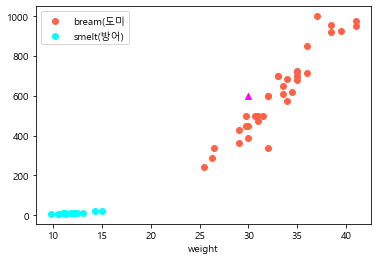

길이가 30, 무게가 600인 물고기는 도미!


In [5]:
# 시각화

# 도미에 대한 길이와 무게의 산점도
plt.scatter(bream_length, bream_weight, label = 'bream(도미', color = 'tomato')
# 방어에 대한 길이와 무게의 산점도
plt.scatter(smelt_length, smelt_weight, label = 'smelt(방어)', color = 'cyan')
# 새로운 데이터 산점도
plt.scatter(30, 600, marker ='^', color = 'magenta')
# 라벨 설정
plt.xlabel('length')
plt.xlabel('weight')
plt.legend()
# 시각화 표현
plt.show()

# 정답 예측
if(kn.predict([[30, 600]]) == 1):
    word = '도미!'
else :
    word = '방어!'
print('길이가 30, 무게가 600인 물고기는', word)

# 머신 러닝 2장

훈련 세트와 테스트 세트를 분리하여 분석

In [6]:
# 도미 데이터와 방어 데이터를 합친 데이터 형성
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
              30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
              33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0,
              36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,  
              10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
              12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
               925.0, 975.0, 950.0, 6.7,  7.5, 7.0, 9.7, 9.8, 8.7, 
               10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 물고기 데이터를 2차원 리스트[길이, 무게]로 형성
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)] 

# target 값 생성
fish_target = [1] * 35 + [0] * 14 

In [7]:
# numpy 라이브러리 import
import numpy as np

# 사이킷런으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

# random에 대한 seed 값을 42로 fish_data와 fish_target 데이터를 train과 test로 각각 부리
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state = 42)

In [8]:
# 머신러닝에 사용할 KNeighborsClassifier 함수 import
from sklearn.neighbors import KNeighborsClassifier

# 모델 생성
kn = KNeighborsClassifier()

데이터 전처리(표준 점수로 변환)

In [9]:
# 각 열의 평균 게산
mean = np.mean(train_input, axis = 0)
# 각 열의 표준편차 계산
std = np.std(train_input, axis = 0)

# 표준 점수 계산
train_scaled = (train_input - mean) / std

In [10]:
# 샘플 데이터(25, 150)를 표준 점수로 변환
new  = ([25, 150] - mean) / std

In [11]:
# 표준 점수로 변환한 훈련 데이터로 k-NN 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

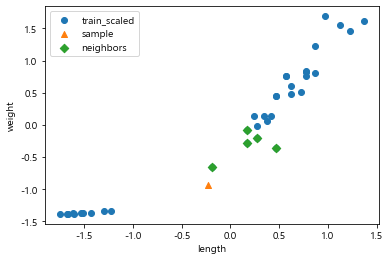

In [12]:
# 표준 점수로 변경된 샘플 데이터(25, 150)의 이웃 찾기 및 산점도

# 샘플 데이터의 이웃 값 찾기
distances, indexes = kn.kneighbors([new])

# 산점도로 시각화
# train 산점도
plt.scatter(train_scaled[:,0], train_scaled[:,1], label='train_scaled')
# 샘플 데이터 산점도
plt.scatter(new[0], new[1], marker='^', label = 'sample')
# 이웃 값 산점도
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D', label='neighbors')

plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()